#  Plotting for Exploratory Data Analysis of  Haberman Cancer Survival Detaset







*   Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set 
*   The dataset contains survival of patients who had undergone surgery for breast cancer.
*   The study was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital.



### 1) Analysing *Dataset* ###



In [2]:
from google.colab import files
file = files.upload()       #Loading dataset from local host 


Saving haberman.csv to haberman.csv


In [3]:
# to remove unnecessary warning messages from python 

import warnings                                     #https://colab.research.google.com/drive/1X_Sz-WmjBQQx_GJKPaI1SpkFRapvpe6u#scrollTo=ahhAFARHgnut
warnings.filterwarnings('ignore')


 1. Quick look at what the data looks like: 










In [4]:
import pandas as pd
data = pd.read_csv('haberman.csv')     #Reading csv file and printing its top 5 Rows
print (data.head())     

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1




*  column names are not present so first add the column names.



In [5]:
import pandas as pd
data = pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])    #Reading csv file and adding column names.
print(data.head())


   age  operation_Year  axil_nodes  survival_status
0   30              64           1                1
1   30              62           3                1
2   30              65           0                1
3   31              59           2                1
4   31              65           4                1




2.   Checking the column names in the dataset. 



In [6]:
print(data.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')





3.   How many data points are in there ?



In [7]:
print(data.shape)

(306, 4)


Observation : 
 

1.   This dataset having 306 rows and 4 columns.
2.   In survival status colume the valus are given in 1 and 2 ie in int format which are non readable and predictable.
3.   So firstly we need to convert survival status as follows:
        1 as patient survived and 
        2 as patient not survived 




In [8]:
# first need to find unique values form the column survival_status

a=data['survival_status'].unique()        #https://www.geeksforgeeks.org/python-pandas-series-unique/
print(a)


[1 2]


In [9]:
# so as to replace 1 & 2 with "yes" & "no" respectively

data['survival_status']=data['survival_status'].map({1:'yes',2:'no'})   #https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
print(data.head())

   age  operation_Year  axil_nodes survival_status
0   30              64           1             yes
1   30              62           3             yes
2   30              65           0             yes
3   31              59           2             yes
4   31              65           4             yes


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              306 non-null    int64 
 1   operation_Year   306 non-null    int64 
 2   axil_nodes       306 non-null    int64 
 3   survival_status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB
None


### 2) High Level Analysis ###

In [11]:
print(data.describe())

              age  operation_Year  axil_nodes
count  306.000000      306.000000  306.000000
mean    52.457516       62.852941    4.026144
std     10.803452        3.249405    7.189654
min     30.000000       58.000000    0.000000
25%     44.000000       60.000000    0.000000
50%     52.000000       63.000000    1.000000
75%     60.750000       65.750000    4.000000
max     83.000000       69.000000   52.000000


In [12]:
print('Number of rows :', data.shape[0])
print("Number of columns :", data.shape[1])
print(data['survival_status'].value_counts())

Number of rows : 306
Number of columns : 4
yes    225
no      81
Name: survival_status, dtype: int64


Observation :


1.   The minimum age is 30 and maximum age is 83.
2.   Number of patients survive the operation is significantly higher.
3.   The maximum axil node observe is 52



# Objective :
   > Q) To understand whether the patient will survive after 5 years or not.



  ## Pair Plot## 





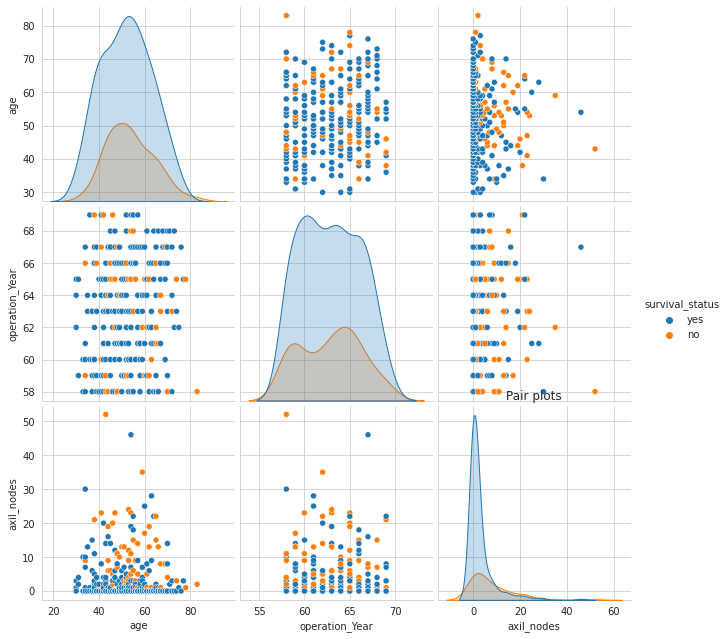

In [13]:
#Pair plot plots the plot between every two columns in a given data.

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")                                 #plotting pair plot on whitegrid background of size 3
sns.pairplot(data,hue="survival_status", size=3)
plt.title('Pair plots')
plt.show()
# The diagnol elements are PDFs for each feature. 


* Observation
  

1. From visual inspection of this Pair Plot it is difficult to understand the exact seperation for survival status.
2.   But in plot of age and axile nodes it is significantly seperate from each other.
3. Lets observe them closely.  






 ## 2D scatter plot## 






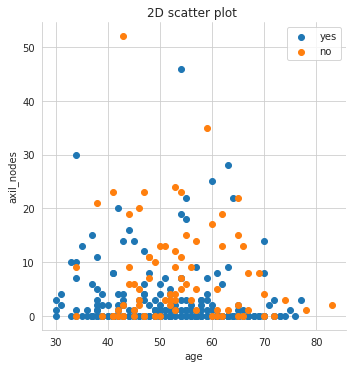

In [14]:
#plotting a 2D scatter plot on the basis of observation made in pair plot. 
#it is easy to understand. 
#can differentiate two parameters easily. 

import seaborn as sns
import matplotlib.pyplot as plt     
sns.set_style('whitegrid')
graph = sns.FacetGrid(data, hue='survival_status', size=5 )   #https://www.geeksforgeeks.org/python-seaborn-facetgrid-method/
graph.map(plt.scatter, "age", "axil_nodes")                   
plt.legend() 
plt.title('2D scatter plot ')
plt.show()


* Observation 


1. Above 2D scatter plot shows the relation between axile node and age.
2. By observing the graph we can easily find some outliers. 
   





  ## Histogram ##


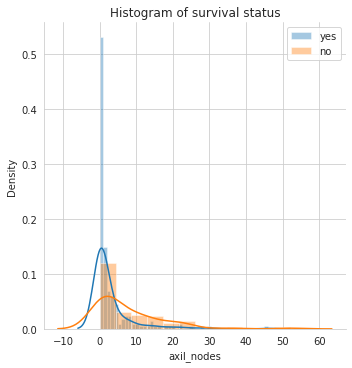

In [15]:
# Histogram for axile_nodes vs Survival_status
# histogram gives graphical representation of numerical data distribution.
# It also shows the smooth PDf line.
# Height of the bar represent the no of data points present in that section.

y =sns.FacetGrid(data, hue="survival_status", size=5) 
y.map(sns.distplot, "axil_nodes") 
plt.legend()
plt.title('Histogram of survival status')
plt.show()



*   Observation

1. Axil nodes have some outliers.
2. Maximum points of axil nodes lies between 0 to 10 and have maximum positive density as well. 




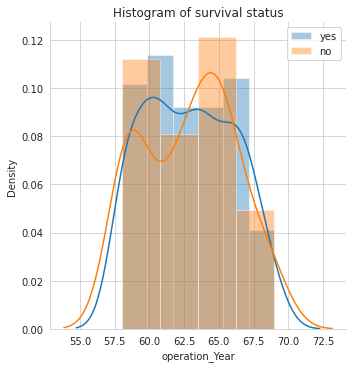

In [16]:
# Histogram for operation_Year vs Survival_status

x = sns.FacetGrid(data, hue="survival_status", size=5) 
x.map(sns.distplot, "operation_Year") 
plt.legend()
plt.title('Histogram of survival status')
plt.show()

* Observation 
1. Lots of data is getiing overlap in this combination.
2. We can not make a any decision by observing above graph.


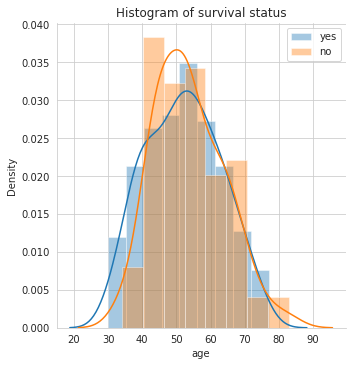

In [17]:
# Histogram for age vs Survival_status

z= sns.FacetGrid(data, hue="survival_status", size=5) 
z.map(sns.distplot, "age") 
plt.legend()
plt.title('Histogram of survival status')
plt.show()

* Observation 
1. Between age of 40 to 55 survival chances of patients are less.
2. But we can not say it with confidence.
3. We need alternate solution.
  



  ## PDF & CDF ##



pdf = [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
Bin edge = [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
cdf = [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


Text(0.5, 1.0, 'PDF & CDF for feature axile_nodes')

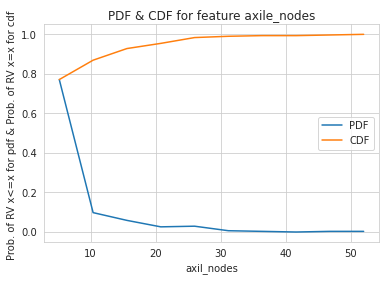

In [33]:
#pdf and cdf for axil_node
#probability density function (pdf) is the derivative of a cumulative distribution function (cdf).

import numpy as np

counts, bin_edges = np.histogram(data['axil_nodes'], bins=10,  density = True)      #https://www.tutorialspoint.com/how-to-plot-cdf-in-matplotlib-in-python                                                       

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

print('pdf =',pdf)
print('Bin edge =',bin_edges)
print('cdf =' , cdf)

plt.plot(bin_edges[1:],pdf , label= "PDF")     #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.plot(bin_edges[1:], cdf , label= "CDF")
plt.xlabel('axil_nodes')
plt.legend()
plt.ylabel("Prob. of RV x<=x for pdf & Prob. of RV x=x for cdf ")          
plt.title("PDF & CDF for feature axile_nodes")


pdf = [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
Bin edge = [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
cdf = [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


Text(0.5, 1.0, 'PDF & CDF for feature  age')

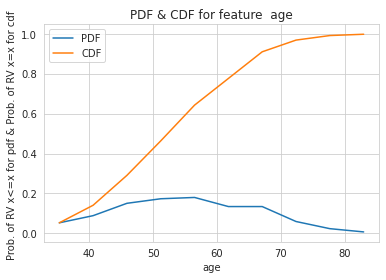

In [34]:
# pdf and cdf for age


counts, bin_edges = np.histogram(data['age'], bins=10, density = True)
                                 
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

print('pdf =',pdf)
print('Bin edge =',bin_edges)
print('cdf =' , cdf)

plt.plot(bin_edges[1:],pdf, label = "PDF")
plt.plot(bin_edges[1:], cdf, label = "CDF")
plt.xlabel('age')
plt.ylabel("Prob. of RV x<=x for pdf & Prob. of RV x=x for cdf ")  
plt.legend()        
plt.title("PDF & CDF for feature  age")



pdf = [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
Bin edge = [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
cdf = [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


Text(0.5, 1.0, 'PDF & CDF for feature operation_year')

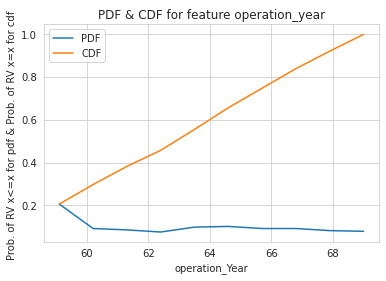

In [35]:
# pdf and cdf for operation_Year

counts, bin_edges = np.histogram(data['operation_Year'], bins=10, density = True) 
                                
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

print('pdf =',pdf)
print('Bin edge =',bin_edges)
print('cdf =' , cdf)

plt.plot(bin_edges[1:],pdf, label= "PDF")
plt.plot(bin_edges[1:], cdf, label= "CDF")
plt.xlabel('operation_Year')
plt.ylabel("Prob. of RV x<=x for pdf & Prob. of RV x=x for cdf ")  
plt.legend()        
plt.title("PDF & CDF for feature operation_year")


* Observation 


1. Data in column 'age' is kind of simillar to normal distribution.
2. As exil  nodes decreases chances of survival increases.





* ## Box Plot ##  



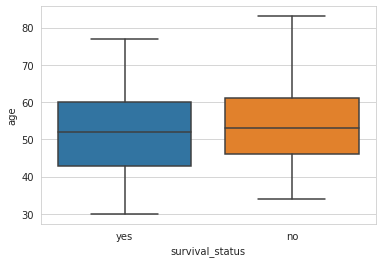

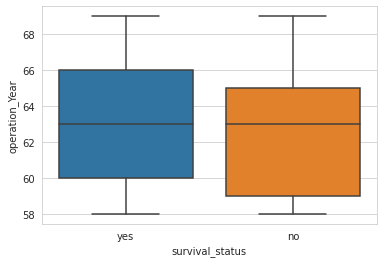

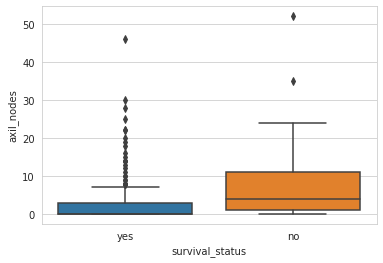

In [ ]:
#Box-plot with whiskers: another method of visualizing the 1-D scatter plot more deeply.
#it contains information about median, percentile, quantile

sns.boxplot(x='survival_status',y='age', data=data)       #plotting boxplot for various functions
plt.show()

sns.boxplot(x='survival_status',y='operation_Year', data=data)
plt.show()

sns.boxplot(x='survival_status',y='axil_nodes', data=data)
plt.show()


* Observation 
1. From 1960 to 1966 there are more chances of survival of the patients.
2. The 50th percentile value of surviving patients are approximately simillar  to non surviving patients in age column. 



*  ## Violin Plot ##



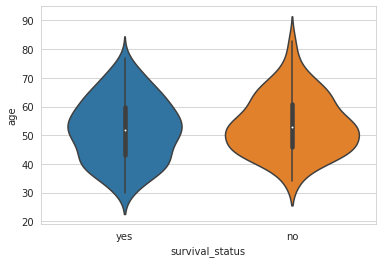

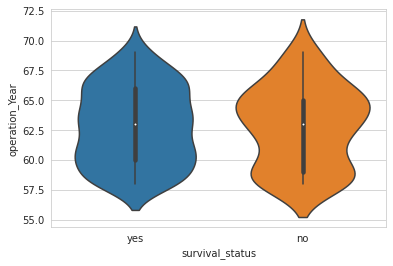

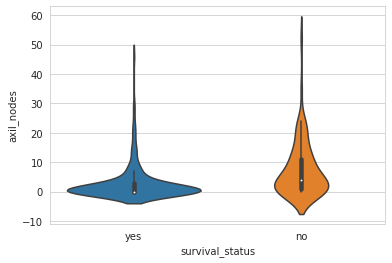

In [ ]:
# violin plot combines the benefits of pdf plots and boxplot and shows them in simple form.
# fat region represents high density of data points.

sns.violinplot(x='survival_status',y='age', data=data)         #plotting violinplot for various functions 
plt.show()

sns.violinplot(x='survival_status',y='operation_Year', data=data)
plt.show()

sns.violinplot(x='survival_status',y='axil_nodes', data=data)
plt.show()

* Observation
1. It is difficult to interprit or peredict the survival of patient from operation year.
2. Axile node graph shows that number of surviving patients is significantly large.  

# **Overall Conclusions** - 


*  **From Pair plot and Scatter plot -** 

1. Most important aspect to predict the survival chances is axil node.
2. More than 70% of patients have axil node between  [0,  4]

* **From PDF & CDF -**
1. Patients having exil node below 4 have more chances of survival.
2. Patients with axil node 0, have 98% of chance to survive the operation.
3. It is observe that increase in sxil node decreases the survival chances. 

* **From Histogram -** 

1. From year 1960, chances of survivng a patient gets incresed. 
2. It is also been observed thet patient whoes ages is between  [40, 55] survive more.
3. 73% patients have axil node between [0, 10] 

* **From Box plot and Violin plot -** 
  
1. Box plot and violin plot between survival status and axil node have best presentation for classification.  
2. Overall 75 % patients are survived the surgery for breast cancer. 